![matplotlib](https://matplotlib.org/_static/logo2.png)

(image: matplotlib.org)

## Workshop: Matplotlib and Data Visualization

In this workshop, we will cover using Matplotlib to create data visualizations.

By now, you have already seen Matplotlib in action in the NumPy and Pandas workshops. This workshop serves as a more structured introduction to Matplotlib.

Specifically, we'll be focusing on `matplotlib.pyplot`.

### Cheatsheet

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

### References

1. https://matplotlib.org/api/pyplot_summary.html
2. https://scipy-cookbook.readthedocs.io/items/idx_matplotlib_simple_plotting.html


### Installation
Windows: Start Button -> "Anaconda Prompt"

Ubuntu / MacOS: conda should be in your path

Activate the environment

```
conda activate module1
```

Matplotlib should already be installed. If not, install it:
```
conda install matplotlib
```

### Average Daily Polyclinic Attendances for Selected Diseases

We will be practicing `matplotlib` concepts on this dataset.

### Download Instructions

1. Go to https://data.gov.sg/dataset/average-daily-polyclinic-attendances-selected-diseases
2. Click on the Download button
3. Unzip and extract the .csv file. Note the path for use below

Note: on Windows you may wish to rename the unzipped folder to something shorter.

In [3]:
import matplotlib
matplotlib?

In [2]:
import matplotlib.pyplot as plt
plt?

### Read the data

We'll use `pandas.read_csv` to read the data

In [33]:
import pandas as pd

# Use pandas to read the CSV file into a pandas.DataFrame,
#   parsing the dates for the `epi_week` column,
#   setting the 0th column as the index

df = pd.read_csv('D:/tmp/polyclinic-attendance/average-daily-polyclinic-attendances-for-selected-diseases.csv',
                 parse_dates=['epi_week'], index_col=0)
df.head(5)

,disease,no._of_cases
epi_week,,
2012-W01,Acute Upper Respiratory Tract infections,2932
2012-W01,Acute Conjunctivitis,120
2012-W01,Acute Diarrhoea,491
2012-W01,Chickenpox,18
2012-W02,Acute Upper Respiratory Tract infections,3189


Uh oh, the date format is still a string. Let's double-check its type.

In [34]:
df.index

Index(['2012-W01', '2012-W01', '2012-W01', '2012-W01', '2012-W02', '2012-W02',
       '2012-W02', '2012-W02', '2012-W03', '2012-W03',
       ...
       '2017-W50', '2017-W50', '2017-W51', '2017-W51', '2017-W51', '2017-W51',
       '2017-W52', '2017-W52', '2017-W52', '2017-W52'],
      dtype='object', name='epi_week', length=1252)

Hmm, looks like this date format isn't recognized.

We'll need to supply a custom date parser.

In [35]:
# create the parser 
def parse_date(date):
    """Parses a yyyy-WNN date string
    Args:
        date: a date string in the yyyy-WNN format
    Returns:
        A pandas.datetime64 
    """
    # https://stackoverflow.com/questions/17087314/get-date-from-week-number
    return pd.datetime.strptime(date + '-0', '%Y-W%W-%w')

def parse_dates(dates):
    """Parses a list of dates
    Args:
        dates: a list of dates
    Returns:
        A list of pandas.datetime64
    """
    return [parse_date(d) for d in dates]

# test the parser
parse_dates(['2012-W01', '2012-W52'])

[datetime.datetime(2012, 1, 8, 0, 0), datetime.datetime(2012, 12, 30, 0, 0)]

### Re-read the CSV with custom date parser

In [36]:
df = pd.read_csv('D:/tmp/polyclinic-attendance/average-daily-polyclinic-attendances-for-selected-diseases.csv',
                 parse_dates=['epi_week'], date_parser=parse_dates,
                 index_col=0)

df.head(5)

,disease,no._of_cases
epi_week,,
2012-01-08,Acute Upper Respiratory Tract infections,2932
2012-01-08,Acute Conjunctivitis,120
2012-01-08,Acute Diarrhoea,491
2012-01-08,Chickenpox,18
2012-01-15,Acute Upper Respiratory Tract infections,3189


In [37]:
df.index

DatetimeIndex(['2012-01-08', '2012-01-08', '2012-01-08', '2012-01-08',
               '2012-01-15', '2012-01-15', '2012-01-15', '2012-01-15',
               '2012-01-22', '2012-01-22',
               ...
               '2017-12-17', '2017-12-17', '2017-12-24', '2017-12-24',
               '2017-12-24', '2017-12-24', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='epi_week', length=1252, freq=None)

### Plots

Let's try to plot these graphs:
1. Line plot showing total number of cases over time
2. Overlaid line plots showing number of cases per type, over time
3. Bar chart showing distribution of types of cases over time

### Plot workflow

Before we begin, here's a generic workflow for creating a plot.

```
import matplotlib.pyplot as plt

# create subplots lined up as 1 row and 2 columns
# 20 x 10 "figure units"
# ax1 and ax2 are the axes for each of the subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(20, 10))


# get pandas DataFrames
df1 = ...
df2 = ...

# plot the DataFrames
df1.plot(ax=ax1)
ax1.set(title='The left plot',
        ylabel='the y-axis',
        xlabel='the x-axis')

df2.plot(ax=ax2)
ax2.set(title='The right plot',
        ylabel='the y-axis',
        xlabel='the x-axis')

```

The workflow can be adapted to create any number of plots. 

For example, to create 1 plot:
```
fig, (ax) = plt.subplots(figsize=(20, 10)) # default nrows=1, ncols=1
```

To create 2 rows of plots:
```
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,
                               figsize=(20, 10))

# ax1 is the top row
# ax2 is the bottom row
```

To plot multiple graphs in the same plot:
```
fig, (ax) = plt.subplots(figsize=(20, 10))

df1.plot(ax=ax)
df2.plot(ax=ax)
```

### Line plot showing total number of cases over time

To plot this, we need to sum up the cases for each date.

A pandas DataFrame already provides a `plot()` method that returns a `matplotlib` `AxesSubplot`. It's just a raw plot using the column names as the default axis labels.

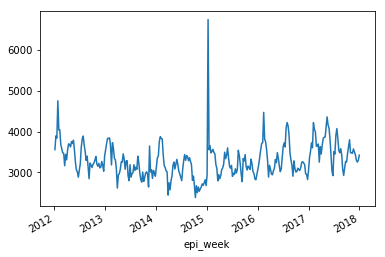

In [49]:
df.groupby(df.index)['no._of_cases'].sum().plot()

### Exercise: Plot Customization

Use the workflow to create a customized plot:
1. Make the plot bigger by setting figsize
2. Set the X axis to 'Year'
3. Set the Y axis to 'Number of cases'
4. Set the title to 'Polyclinic Cases for Selected Diseases'

You can add more customization options, such as `ax.grid()` to turn on the grid.
See: https://matplotlib.org/api/axes_api.html#appearance

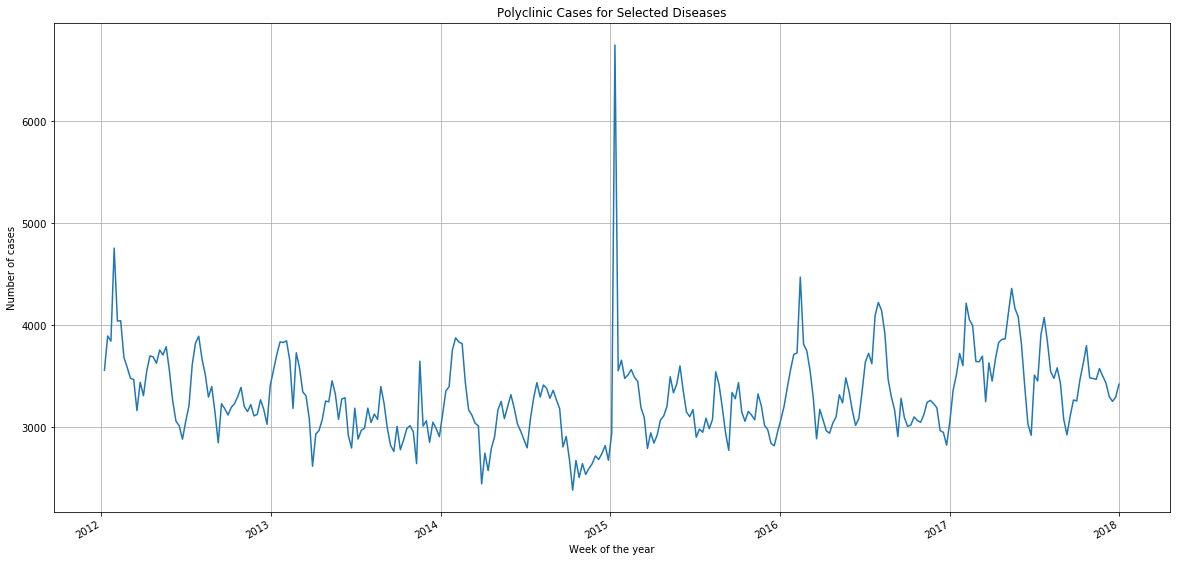

In [55]:
# Your code here

fig, ax = plt.subplots(figsize=(20, 10))

df.groupby(df.index)['no._of_cases'].sum().plot(ax=ax)

ax.set(title='Polyclinic Cases for Selected Diseases',
      ylabel='Number of cases',
      xlabel='Week of the year')
ax.grid()

### Overlaid line plots showing number of cases per type, over time

Based on the plot, it looks like something serious happened in early 2015.

Let's find out what type of cases contributed to this spike, by plotting a line per type.

First, we need to know what types of diseases there are.

In [57]:
# find the columns
df.columns

Index(['disease', 'no._of_cases'], dtype='object')

In [59]:
# find unique values for the `disease` column
df.disease.unique()

array(['Acute Upper Respiratory Tract infections', 'Acute Conjunctivitis',
       'Acute Diarrhoea', 'Chickenpox'], dtype=object)

In [85]:
# we can get the Series for number of cases for one disease
df_diarrhoea = df[df.disease == 'Acute Diarrhoea']
diarrhoea_cases = df_diarrhoea.groupby(df_diarrhoea.index)['no._of_cases'].sum()

diarrhoea_cases

epi_week
2012-01-08    491
2012-01-15    575
2012-01-22    539
2012-01-29    615
2012-02-05    559
2012-02-12    557
2012-02-19    529
2012-02-26    513
2012-03-04    505
2012-03-11    488
2012-03-18    432
2012-03-25    507
2012-04-01    477
2012-04-08    486
2012-04-15    487
2012-04-22    502
2012-04-29    478
2012-05-06    537
2012-05-13    488
2012-05-20    481
2012-05-27    454
2012-06-03    428
2012-06-10    404
2012-06-17    416
2012-06-24    399
2012-07-01    468
2012-07-08    498
2012-07-15    547
2012-07-22    545
2012-07-29    565
             ... 
2017-06-11    468
2017-06-18    464
2017-06-25    455
2017-07-02    617
2017-07-09    529
2017-07-16    616
2017-07-23    612
2017-07-30    605
2017-08-06    576
2017-08-13    597
2017-08-20    599
2017-08-27    568
2017-09-03    481
2017-09-10    461
2017-09-17    529
2017-09-24    510
2017-10-01    483
2017-10-08    504
2017-10-15    518
2017-10-22    575
2017-10-29    532
2017-11-05    507
2017-11-12    519
2017-11-19    544
2

In [82]:
# List comprehension will give us a list of Series
cases_per_disease = [df[df.disease == d].groupby(
    df[df.disease == d].index)['no._of_cases'].sum()
 for d in df.disease.unique()]

cases_per_disease

[epi_week
 2012-01-08    2932
 2012-01-15    3189
 2012-01-22    3185
 2012-01-29    4001
 2012-02-05    3356
 2012-02-12    3358
 2012-02-19    3033
 2012-02-26    2953
 2012-03-04    2855
 2012-03-11    2868
 2012-03-18    2615
 2012-03-25    2803
 2012-04-01    2711
 2012-04-08    2935
 2012-04-15    3098
 2012-04-22    3056
 2012-04-29    3022
 2012-05-06    3090
 2012-05-13    3100
 2012-05-20    3167
 2012-05-27    2982
 2012-06-03    2719
 2012-06-10    2550
 2012-06-17    2495
 2012-06-24    2381
 2012-07-01    2471
 2012-07-08    2597
 2012-07-15    2949
 2012-07-22    3168
 2012-07-29    3214
               ... 
 2017-06-11    2842
 2017-06-18    2476
 2017-06-25    2374
 2017-07-02    2793
 2017-07-09    2835
 2017-07-16    3191
 2017-07-23    3355
 2017-07-30    3132
 2017-08-06    2867
 2017-08-13    2783
 2017-08-20    2893
 2017-08-27    2771
 2017-09-03    2502
 2017-09-10    2378
 2017-09-17    2489
 2017-09-24    2665
 2017-10-01    2686
 2017-10-08    2881
 2017-10-1

### Exercise: Multi-line Plots

Plot each Series in `cases_per_disease` as a line on the SAME plot.

1. Plot each line on the same axis
2. Make the plot bigger by setting figsize
3. Set the X axis to 'Year', Y axis to 'Number of cases', title to 'Polyclinic Cases for Selected Diseases'
4. Set the legend using `ax.legend(df.disease.unique())`

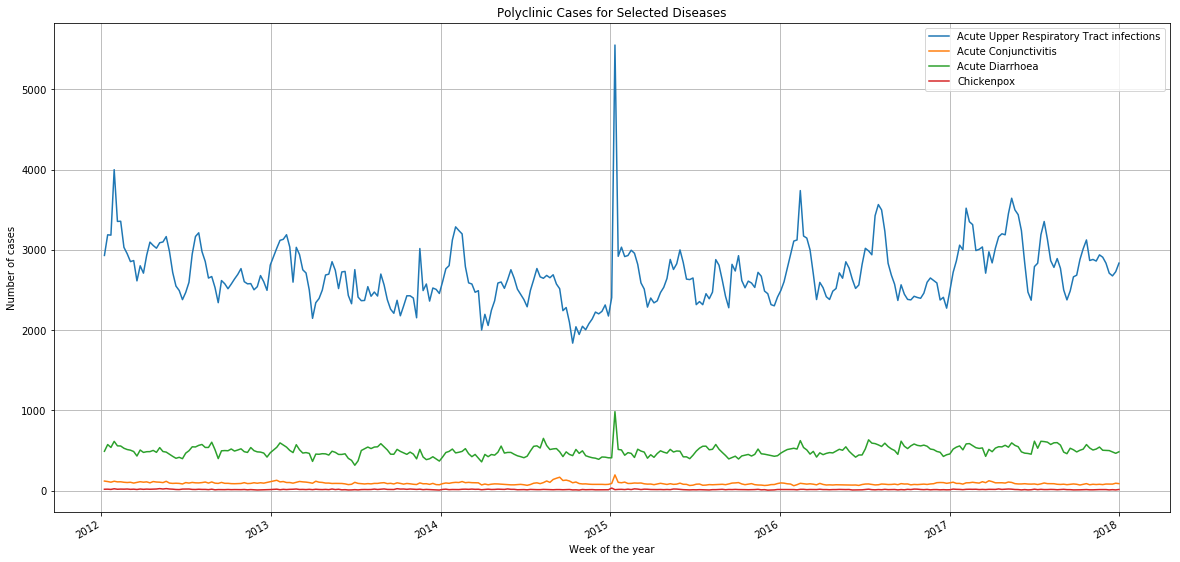

In [90]:
# Your code here

fig, ax = plt.subplots(figsize=(20, 10))

[s.plot(ax=ax) for s in cases_per_disease]

ax.set(title='Polyclinic Cases for Selected Diseases',
      ylabel='Number of cases',
      xlabel='Week of the year')
ax.grid()
ax.legend(df.disease.unique())

So the majority of the cases in 2015 are due to "Acute Upper Respiratory Tract infections."

A search of the internet reveals that this coincided with the 2015 haze.

In [92]:
df[df.disease == 'Acute Upper Respiratory Tract infections']


,disease,no._of_cases
epi_week,,
2012-01-08,Acute Upper Respiratory Tract infections,2932
2012-01-15,Acute Upper Respiratory Tract infections,3189
2012-01-22,Acute Upper Respiratory Tract infections,3185
2012-01-29,Acute Upper Respiratory Tract infections,4001
2012-02-05,Acute Upper Respiratory Tract infections,3356
2012-02-12,Acute Upper Respiratory Tract infections,3358
2012-02-19,Acute Upper Respiratory Tract infections,3033
2012-02-26,Acute Upper Respiratory Tract infections,2953
2012-03-04,Acute Upper Respiratory Tract infections,2855


### Bar chart showing distribution of types of cases over time

In our final plot, we'll do a bar chart what shows 